In [242]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) #original colour range
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255) #original colour range
    ax[1].imshow(img2, cmap='gray', vmin=0, vmax=1)

def plot_three_images(img1: np.array, img2: np.array, img3: np.array):
    _, ax = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots
    ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255) #original colour range
    ax[1].imshow(img2, cmap='gray', vmin=0, vmax=1)
    ax[2].imshow(img3, cmap='gray', vmin=0, vmax=1)
    plt.show()

def plot_four_images(img1: np.array, img2: np.array, img3: np.array, img4: np.array):
    _, ax = plt.subplots(1, 4, figsize=(24, 6))  #4 subplots
    ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255) #original colour range
    ax[1].imshow(img2, cmap='gray', vmin=0, vmax=1)
    ax[2].imshow(img3, cmap='gray', vmin=0, vmax=1)
    ax[3].imshow(img4, cmap='gray', vmin=0, vmax=1)
    plt.show()

def plot_five_images(img1: np.array, img2: np.array, img3: np.array, img4: np.array, img5: np.array):
    _, ax = plt.subplots(1, 5, figsize=(30, 6))  #4 subplots
    ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255) #original colour range
    ax[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
    ax[2].imshow(img3, cmap='gray', vmin=0, vmax=1)
    ax[3].imshow(img4, cmap='gray', vmin=0, vmax=1)
    ax[4].imshow(img5, cmap='gray', vmin=0, vmax=1)
    plt.show()

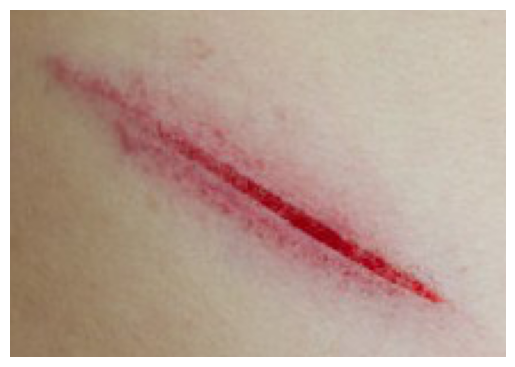

type(img3)=<class 'numpy.ndarray'> img3.shape=(152, 217, 3)


In [189]:
img3 = plt.imread('cut2_cropped.jpg')
plt.imshow(img3)                       
plt.axis('off')                       
plt.show()
print(f'{type(img3)=}', f'{img3.shape=}')

Text(0.5, 1.0, 'Blue Channel(in Grayscale)')

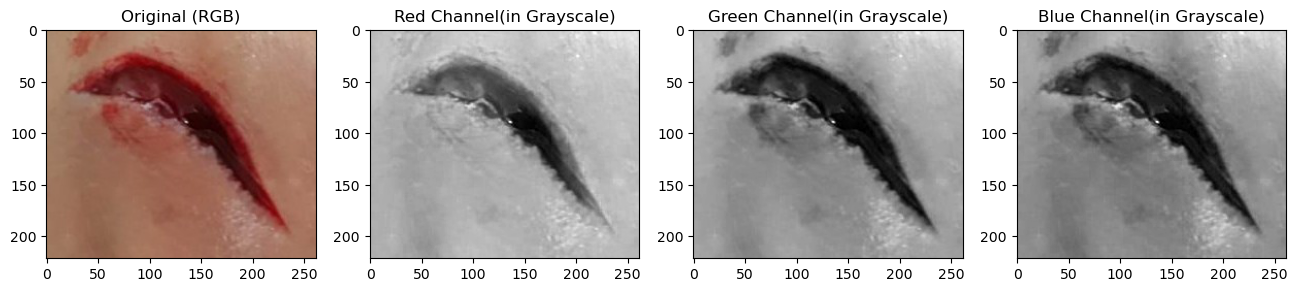

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

ax_original, ax_red, ax_green, ax_blue = ax

ax_original.imshow(img3)
ax_original.set_title('Original (RGB)')

# ALL row & ALL columns of layer 0
ax_red.imshow(img3[:, :, 0], cmap='gray')
ax_red.set_title('Red Channel(in Grayscale)')

# ALL row & ALL columns of layer 1
ax_green.imshow(img3[:, :, 1], cmap='gray')
ax_green.set_title('Green Channel(in Grayscale)')

# ALL row & ALL columns of layer 2
ax_blue.imshow(img3[:, :, 2], cmap='gray')
ax_blue.set_title('Blue Channel(in Grayscale)')

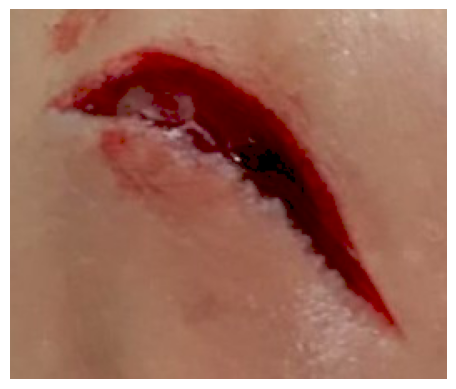

In [37]:
threshold = 40
img_no_noise = img3.copy()
img_no_noise[img_no_noise < threshold] = 0
plt.imshow(img_no_noise)                       
plt.axis('off')                       
plt.show()

In [295]:
from skimage import io
import skimage.color
img_original = io.imread('cut1.jpg')
img_grey = rgb2gray(img_original)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax_original, ax_grey = ax

ax_original.imshow(img_original)
ax_original.set_title(f'Original: shape={img_original.shape}')

ax_grey.imshow(img_grey, cmap='gray')
ax_grey.set_title(f'Grayscale: shape={img_grey.shape}')

for a in ax.flat:
    a.axis('off')

NameError: name 'rgb2gray' is not defined

In [269]:
'''
def clean_isolated_pixels(img: np.array) -> np.array:
    x_len = img.shape[1] #columns
    y_len = img.shape[0] #rows
    cleaned_img = np.zeros(shape=(y_len, x_len))
    for y in range(1, y_len-1):
        # Iterate over the columns
        for x in range(1, x_len-1):
            # img[y, x] = individual pixel value
            if img[y-1,x] == 1 and img[y,x-1] == 1 and img[y,x+1] == 1 and img[y+1,x] == 1:
                print(f'{y},{x} neighbours all 1')
                cleaned_img[y,x] = 0
            elif img[y-1,x] == 0 and img[y,x-1] == 0 and img[y,x+1] == 0 and img[y+1,x] == 0:
                print(f'{y},{x} neighbours all 0')                
                cleaned_img[y,x] = 1
            else:
                cleaned_img[y,x] = img[y,x]
    return cleaned_img
'''


'''OLD CLEAN ISOLATED PIXELS CODE
def clean_isolated_pixels(img: np.array) -> np.array:
    # Ensure we work with a binary image (0/1)
    #img = (img > 0).astype(np.uint8)
    #print(img[7,18])
    y_len, x_len = img.shape
    cleaned_img = img.copy()
    #print(cleaned_img[7,18])
    for y in range(1, y_len-1):
        for x in range(1, x_len-1):
            neighborhood = img[y-1:y+2, x-1:x+2] #excludes stop index
            neighbor_count = np.sum(neighborhood) - img[y, x]
            if img[y, x] == 1 and neighbor_count <= min_neighbour_count_on:
                # Pixel is ON, but too few ON neighbors -> likely isolated
                cleaned_img[y, x] = 0
            elif img[y, x] == 0 and neighbor_count >= min_neighbour_count_off:
                # Pixel is OFF, but surrounded by ON pixels -> likely noise hole
                cleaned_img[y, x] = 1

    return cleaned_img
'''

'''def keep_largest_zero_patch(img):

    """
    Given a 2D array of 1s and 0s, find all patches of 0s (connected components),
    identify the largest patch, and set all smaller patches to 1.
    
    Args:
        grid: 2D list of 1s and 0s
    
    Returns:
        Modified grid with only the largest zero patch remaining
    """
    cleaned_img_v2 = img.copy()
    rows, cols = img.shape
    visited = [[False] * cols for _ in range(rows)]
    patches = []  # List of (area, cells_list)
    
    def flood_fill(start_r, start_c):
        stack = [(start_r, start_c)]
        cells = []
        
        while stack:
            r, c = stack.pop()
            
            # Skip if out of bounds, already visited, or not a zero
            if (r < 0 or r >= rows or c < 0 or c >= cols or 
                visited[r][c] or img[r][c] == 1):
                continue
            
            visited[r][c] = True
            cells.append((r, c))
            
            # Add all 4 neighbors to stack
            stack.append((r + 1, c))
            stack.append((r - 1, c))
            stack.append((r, c + 1))
            stack.append((r, c - 1))
        
        return cells
    
    # Find all patches of zeros
    for y in range(rows):
        for x in range(cols):
            if img[y][x] == 0 and not visited[y][x]:
                patch_of_zero = flood_fill(y, x)
                patches.append((len(patch_of_zero), patch_of_zero)) #(size of patch, all cells in patch)
    
    # If no patches found, return original grid
    if not patches:
        return cleaned_img_v2
    
    # Find the largest patch
    largest_patch = max(patches, key=lambda x: x[0])
    largest_cells = largest_patch[1]
    
    # Change all zeros not in the largest patch to 1
    for i in range(rows):
        for j in range(cols):
            if img[i][j] == 0 and (i, j) not in largest_cells:
                cleaned_img_v2[i][j] = 1
    
    return cleaned_img_v2'''

'''img_raw = Image.open('cut1.jpg')
img_grayscale = ImageOps.grayscale(img_raw).resize(size=(target_size, target_size))
img_binary = binarise(np.array(img_grayscale))
img_cleaned = clean_isolated_pixels(img_binary)
img_final = keep_largest_zero_patch(img_cleaned)

plot_five_images(
    img1=img_raw,
    img2=img_grayscale,
    img3=img_binary, 
    img4=img_cleaned,
    img5=img_final
)'''

'''def clean_isolated_pixels(img: np.ndarray) -> np.ndarray:
    """
    Remove isolated pixels and fill small holes using neighbor count.
    
    For each pixel, counts the number of ON (1) neighbors in a 3x3 window.
    - ON pixels with ≤4 ON neighbors are turned OFF (likely noise)
    - OFF pixels with ≥5 ON neighbors are turned ON (likely holes)
    
    Args:
        img: Binary image (0s and 1s)
        
    Returns:
        Cleaned binary image
    """
    from scipy.ndimage import convolve
    
    # Kernel to count neighbors (excludes center pixel)
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
    
    # Count neighbors for each pixel
    neighbor_counts = convolve(img, kernel, mode='constant', cval=0)
    
    cleaned_img = img.copy()
    
    # Remove isolated ON pixels
    isolated_on = (img == 1) & (neighbor_counts <= MIN_NEIGHBOUR_COUNT_ON)
    cleaned_img[isolated_on] = 0
    
    # Fill isolated OFF pixels (holes)
    isolated_off = (img == 0) & (neighbor_counts >= MIN_NEIGHBOUR_COUNT_OFF)
    cleaned_img[isolated_off] = 1
    
    return cleaned_img'''


'def clean_isolated_pixels(img: np.ndarray) -> np.ndarray:\n    """\n    Remove isolated pixels and fill small holes using neighbor count.\n\n    For each pixel, counts the number of ON (1) neighbors in a 3x3 window.\n    - ON pixels with ≤4 ON neighbors are turned OFF (likely noise)\n    - OFF pixels with ≥5 ON neighbors are turned ON (likely holes)\n\n    Args:\n        img: Binary image (0s and 1s)\n\n    Returns:\n        Cleaned binary image\n    """\n    from scipy.ndimage import convolve\n\n    # Kernel to count neighbors (excludes center pixel)\n    kernel = np.array([[1, 1, 1],\n                       [1, 0, 1],\n                       [1, 1, 1]])\n\n    # Count neighbors for each pixel\n    neighbor_counts = convolve(img, kernel, mode=\'constant\', cval=0)\n\n    cleaned_img = img.copy()\n\n    # Remove isolated ON pixels\n    isolated_on = (img == 1) & (neighbor_counts <= MIN_NEIGHBOUR_COUNT_ON)\n    cleaned_img[isolated_on] = 0\n\n    # Fill isolated OFF pixels (holes)\n   

# IMAGE ANALYSIS (ACTUAL)



In the previous sections, we used an arbitrary wound as a model.

This portion implements an image processing pipeline to convert real photographs of wounds into binary arrays suitable for computational analysis. The goal is to extract the wound region from background tissue, enabling quantitative measurements of wound healing.

These parameters control the image analysis process and have been tuned for wound imagery based on our experimentation.

Justification for parameters:

    THRESHOLD_FACTOR = 5/6: Wounds typically appear darker than surrounding healthy tissue. This threshold ensures we capture the full wound area while excluding lighter background:
    MIN_NEIGHBOUR_COUNT_ON = 4: Requires a pixel to have at least half of its 8 neighbors to be considered part of the wound
    MAX_NEIGHBOUR_COUNT_OFF = 5: Fills small holes where most surrounding pixels are wound tissue



In [255]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

In [374]:
# Configuration parameters for image analysis
TARGET_SIZE              = 50     # Target dimensions for square resizing
THRESHOLD_FACTOR         = 5 / 6   # Multiplier for threshold binarisation
MIN_NEIGHBOUR_COUNT_ON   = 4       # Minimum neighbour count for pixel to remain ON 
MAX_NEIGHBOUR_COUNT_OFF  = 5       # Maximum neighbour count for pixel to remain ON

In [375]:
def load_and_preprocess(image_path: str) -> tuple[np.ndarray, np.ndarray]:
    """
    Loads image, converts to grayscale, and resizes.

    Args:
        image_path: Path to input image
        
    Returns:
        tuple: (original image as numpy array, grayscale image as numpy array)
        
    Raises:
        FileNotFoundError: If image file doesn't exist
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    else:
        img_raw = Image.open(image_path)
        img_grayscale = ImageOps.grayscale(img_raw).resize((TARGET_SIZE, TARGET_SIZE))
        return np.array(img_raw), np.array(img_grayscale)

def binarise(img: np.ndarray) -> np.ndarray:
    """
    Converts grayscale image to binary using a threshold.
    
    The threshold is computed as: 0.5 * (lightest pixel + darkest pixel) * threshold_factor
    Pixels above threshold become 1 (white), below become 0 (black).
    
    Args:
        img: 2D grayscale image array
        
    Returns:
        Binary array representing image
    """
    min_val = np.min(img).astype(np.float64)
    max_val = np.max(img).astype(np.float64)
    threshold = 0.5 * (min_val + max_val) * float(THRESHOLD_FACTOR)
    
    return (img > threshold).astype(int)


def clean_isolated_pixels(img: np.ndarray) -> np.ndarray:
    """
    Removes isolated ON or OFF pixels by comparing to the 8 surrounding neighbour pixels.
    
    For each interior pixel (excluding edges), counts the number of ON (1) 
    neighbours in a 3x3 window. This avoids boundary effects where edge pixels 
    have fewer neighbours.

    Rules applied:
    - ON pixels with ≤ min_on ON neighbors are turned OFF (likely isolated noise)
    - OFF pixels with ≥ min_off ON neighbors are turned ON (likely isolated holes)
    
    Args:
        img: Binary image as 2D numpy array
        
    Returns:
        Cleaned binary image with same shape as input
    """
    y_len, x_len = img.shape
    cleaned_img = img.copy()
    
    # Iterate through interior pixels only (exclude edges)
    for y in range(1, y_len - 1):
        for x in range(1, x_len - 1):
            # Extract 3x3 neighbourhood centered on current pixel
            # Note: y+2 and x+2 because slicing excludes stop index
            neighbourhood = img[y-1:y+2, x-1:x+2]
            
            # Count ON neighbors (exclude center pixel)
            neighbour_count = np.sum(neighbourhood) - img[y, x]
            
            # Rule 1: Remove isolated ON pixels
            if img[y, x] == 1 and neighbour_count <= int(MIN_NEIGHBOUR_COUNT_ON):
                cleaned_img[y, x] = 0
            
            # Rule 2: Fill isolated OFF pixels
            elif img[y, x] == 0 and neighbour_count >= int(MAX_NEIGHBOUR_COUNT_OFF):
                cleaned_img[y, x] = 1
    
    return cleaned_img

def find_connected_components(img: np.ndarray, target_value: int = 0) -> list[list[tuple[int, int]]]:
    """
    Find all connected components of a specific value by iteratively checking its 4 direct
    neighbours to the top, down, left, and right.
    
    Args:
        img: 2D binary image
        target_value: Value to find components for (default 0)
        
    Returns:
        List of connected components, where each component is a list of (row, col) tuples, which is 
        the position of each pixel in the component
    """
    rows, cols = img.shape
    visited = np.zeros_like(img, dtype=bool)
    components = []
    
    def flood_fill(start_r: int, start_c: int) -> list[tuple[int, int]]:
        stack = [(start_r, start_c)]
        cells = []
        
        while stack:
            r, c = stack.pop()
            
            if (r < 0 or r >= rows or c < 0 or c >= cols or 
                visited[r, c] or img[r, c] != target_value):
                continue
            
            visited[r, c] = True
            cells.append((r, c))
            
            # Add 4-connected neighbors
            stack.extend([(r+1, c), (r-1, c), (r, c+1), (r, c-1)])
        
        return cells
    
    # Find all components
    for r in range(rows):
        for c in range(cols):
            if img[r, c] == target_value and not visited[r, c]:
                component = flood_fill(r, c)
                if component:  # Only add non-empty components
                    components.append(component)
    
    return components


def keep_largest_component(img: np.ndarray, target_value: int = 0) -> np.ndarray:
    """
    Keep only the largest connected component of target_value, fill others,
    so we can remove small noise regions while preserving the main wound.
    
    Args:
        img: Binary array
        target_value: Value to analyze (default 0 for black regions with no cells)
        
    Returns:
        Array with only largest component of target_value preserved
    """
    components = find_connected_components(img, target_value)
    
    if not components:
        return img.copy()
    
    # Find largest component
    largest_component = max(components, key=len)
    largest_cells_set = set(largest_component)
    
    # Create output image
    result = img.copy()
    fill_value = 1 - target_value  # Opposite of target
    
    # Fill all small components
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] == target_value and (r, c) not in largest_cells_set:
                result[r, c] = fill_value
    
    return result

def keep_largest_two_components(img: np.ndarray, target_value: int = 0) -> np.ndarray:
    """
    Keep only the largest two connected components of target_value,
    filling others, so we can remove small noise regions while preserving 
    the main wound and a secondary significant region.
    
    Args:
        img: Binary array
        target_value: Value to analyze (default 0 for black regions with no cells)
        
    Returns:
        Array with only largest two components of target_value preserved
    """
    components = find_connected_components(img, target_value)
    
    if not components:
        return img.copy()

    # Sort components by size (largest first)
    sorted_components = sorted(components, key=len, reverse=True)

    # Take largest and second largest (if available)
    largest = sorted_components[0]
    second_largest = sorted_components[1] if len(sorted_components) > 1 else []

    # Combine both sets of coordinates
    keep_cells = set(largest) | set(second_largest)

    # Create output image
    result = img.copy()
    fill_value = 1 - target_value  # Opposite of target value

    # Fill all smaller components
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] == target_value and (r, c) not in keep_cells:
                result[r, c] = fill_value

    return result


In [376]:
def plot_processing_pipeline(images: dict, figsize: tuple[int, int] = (30, 6)):
    """
    Visualize multiple stages of image processing.
    
    Args:
        images: Dictionary mapping titles to image arrays
        figsize: Figure size as (width, height)
    """
    n_images = len(images)
    fig, axes = plt.subplots(1, n_images, figsize=figsize)
    
    if n_images == 1:
        axes = [axes]
    
    for ax, (title, img) in zip(axes, images.items()):
        if len(img.shape) == 3:  # RGB image
            ax.imshow(img)
        else:  # Grayscale/binary
            vmin, vmax = (0, 255) if img.max() > 1 else (0, 1)
            ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        
        ax.set_title(title, fontsize=25)
    
    plt.tight_layout()
    plt.show()


def main(image_path: str):
    """Execute complete image processing pipeline."""
    
    try:
        # Load and preprocess
        img_raw, img_grayscale = load_and_preprocess(image_path)
        
        # Convert to binary
        img_binary = binarise(img_grayscale)
        
        # Clean noise
        img_cleaned = clean_isolated_pixels(img_binary)
        
        # Keep largest component
        img_final = keep_largest_component(img_cleaned, target_value=0)
        
        # Visualize results
        plot_processing_pipeline({
            '1. Original': img_raw,
            '2. Grayscale': img_grayscale,
            '3. Binary': img_binary,
            '4. Noise Removed': img_cleaned,
            '5. Largest Region': img_final
        })
        
        return img_final
        
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Please ensure the image file exists in the working directory.")
        return None
    except Exception as e:
        print(f"Unexpected error during processing: {e}")
        return None

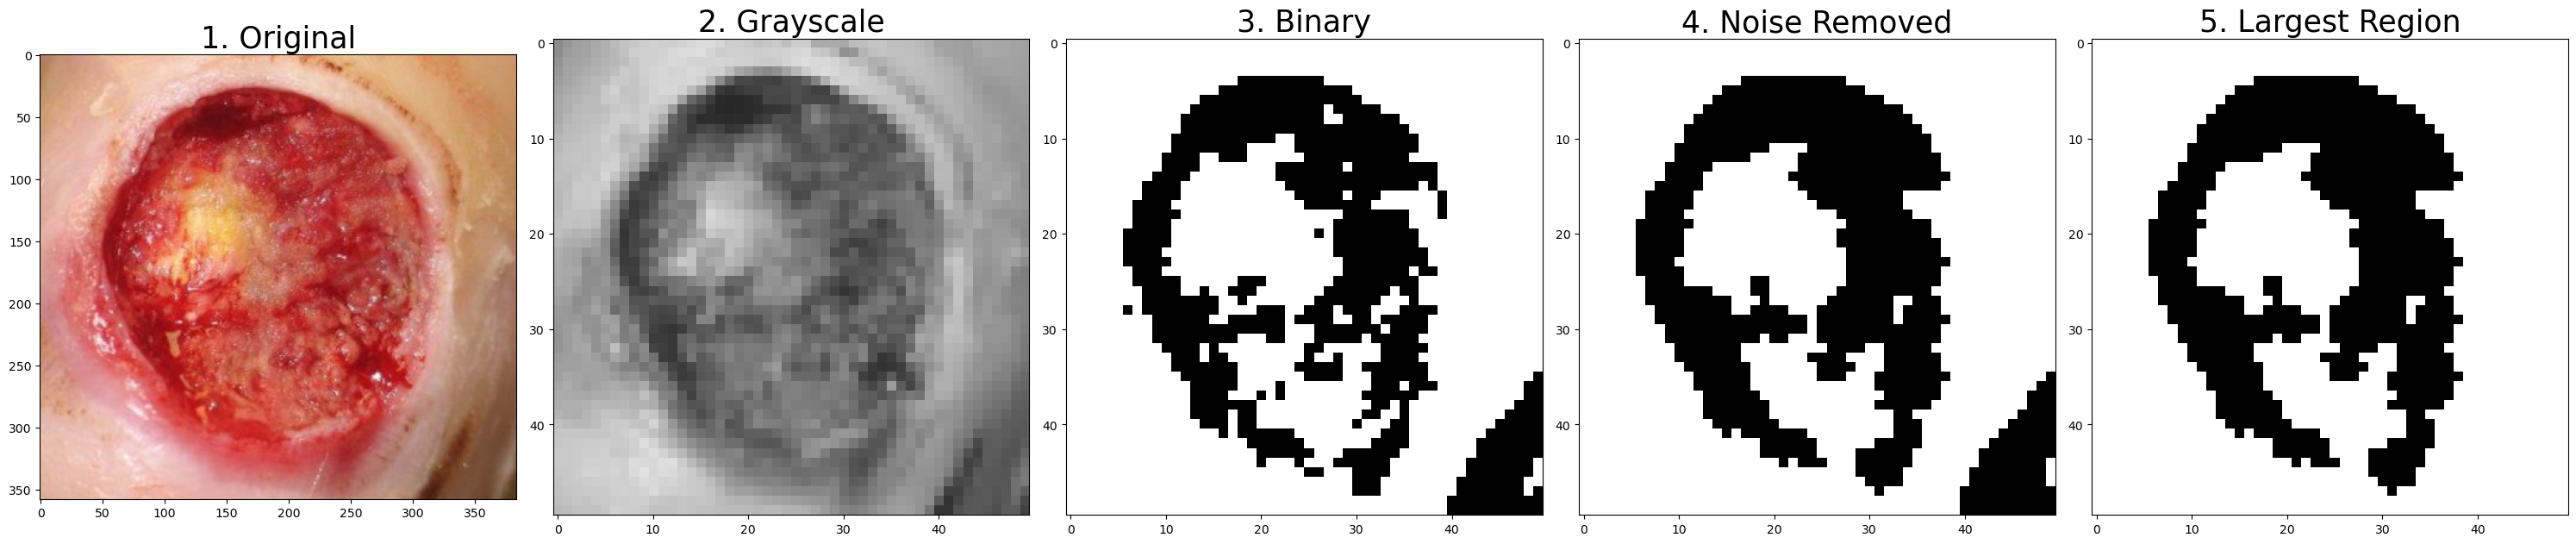

Successfully processed wound image
Final array shape: (50, 50)
Wound pixels: 717
Tissue pixels: 1783


In [377]:
wound_array = main('cut5.jpg')
if wound_array is not None:
    print(f"Successfully processed wound image")
    print(f"Final array shape: {wound_array.shape}")
    print(f"Wound pixels: {np.sum(wound_array == 0)}")
    print(f"Tissue pixels: {np.sum(wound_array == 1)}")

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


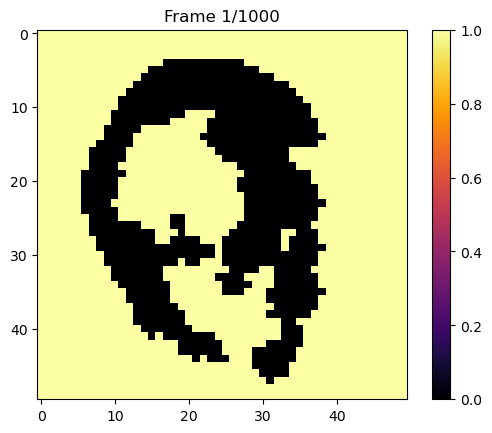

In [379]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0      # Contact inhibition constant
X = 50.0      # Total simulation length (x-axis)
Y = 50.0      # Total simulation lenght (y-axis)
T = 1.0      # Total simulation duration
nx = 50      # Number of spatial points (x-axis)
ny = 50      # Number of spatial points (y-axis)
nt = 1000    # Number of time steps

dx = X / (nx - 1)
dy = Y / (ny - 1)
dt = T / nt

# Spatial and temporal grids
x = np.linspace(0, X, nx)
y = np.linspace(0, Y, ny)
t = np.linspace(0, T, nt)

# Initialise solution array
u = np.zeros((nt, nx, ny))

# Initial condition
#u[0, :, :] = np.array([[max(abs(2*x/X-1), abs(2*y/Y-1)) for x in x] for y in y])
u[0, :, :] = wound_array

# Boundary conditions (fixed at one)
u[:, 0, :] = 1
u[:, -1, :] = 1
u[:, :, 0] = 1
u[:, :, -1] = 1

# Time integration using Explicit Euler
for n in range(nt - 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            du_dx = (u[n, i+1, j] - u[n, i, j]) / dx
            du_dy = (u[n, i, j+1] - u[n, i, j]) / dy
            # Finite difference approximation of the second spatial derivative
            d2u_dx2 = (u[n, i+1, j] - 2 * u[n, i, j] + u[n, i-1, j]) / dx**2
            d2u_dy2 = (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1]) / dy**2
            # Explicit Euler update
            u[n+1, i, j] = u[n, i, j] + (
                -A*(A+u[n, i, j])**(-2)*(du_dx)**2 + A/(A+u[n, i, j])*d2u_dx2 + 
                -A*(A+u[n, i, j])**(-2)*(du_dy)**2 + A/(A+u[n, i, j])*d2u_dy2 + 
                u[n, i, j]*(1-u[n, i, j]))*dt

print(u)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initialize figure and heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(u[0], cmap='inferno', interpolation='nearest', animated=True)
fig.colorbar(heatmap)

# Update function for animation
def update(frame):
    heatmap.set_array(u[frame])
    ax.set_title(f"Frame {frame+1}/{u.shape[0]}")
    return [heatmap]

# Create the animation
ani = FuncAnimation(
    fig, update, frames=u.shape[0], interval=10, blit=True
)

plt.show()
ani.save('animation1.gif', writer='pillow')

In [237]:
import sys
with np.printoptions(threshold=sys.maxsize):
    print("\nFull array using printoptions context manager:")
    print(img_final)


Full array using printoptions context manager:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [22]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a square image
    tgt_size = calculate_target_size(img.shape[0], kernel.shape[0])
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

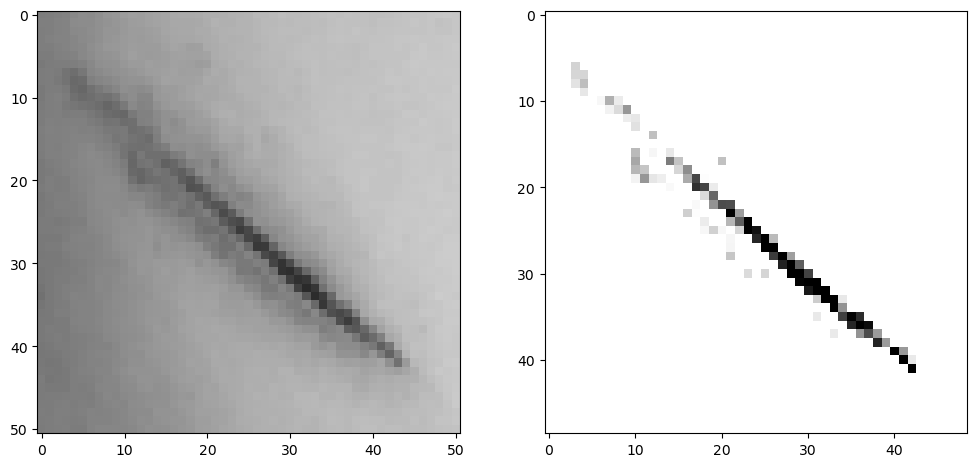

In [25]:
outline = np.array([
    [-1, -1, -1],
    [-1,  10.5, -1],
    [-1, -1, -1]
])
img_outlined = convolve(img=np.array(img), kernel=outline)
plot_two_images(
    img1=img, 
    img2=img_outlined
)

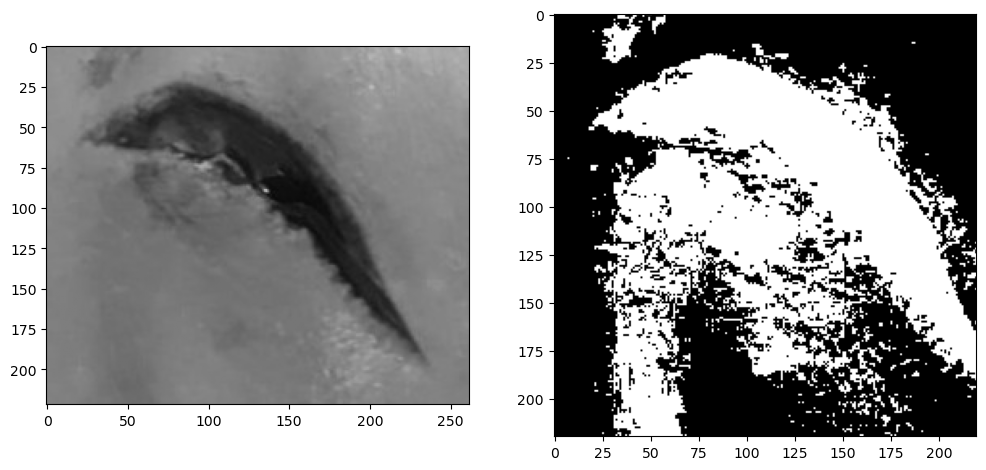

In [ ]:
img_btw2 = black_and_white(img_outlined)
plot_two_images(
    img1=img, 
    img2=img_btw2
)

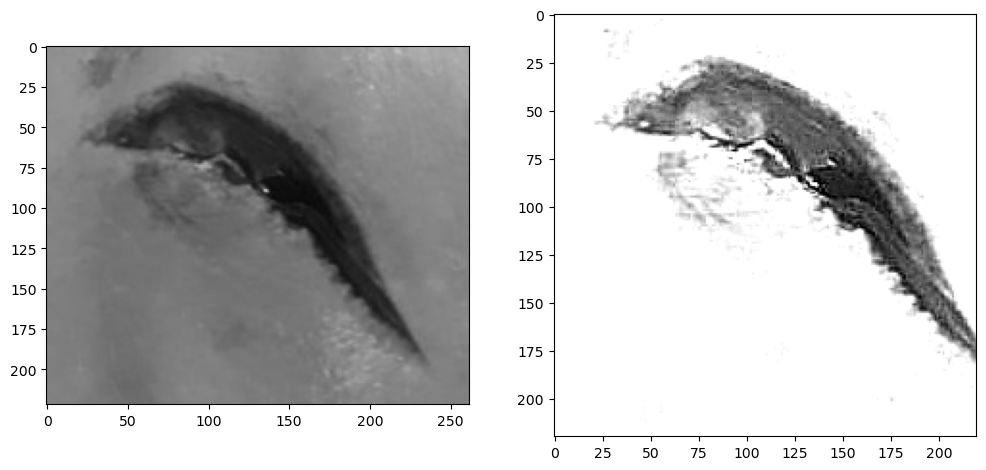

In [ ]:
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

plot_two_images(
    img1=img, 
    img2=negative_to_zero(img=img_outlined)
)

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0      # Contact inhibition constant
X = 1.0      # Total simulation length (x-axis)
Y = 1.0      # Total simulation length (y-axis)
T = 0.5      # Total simulation duration
nx = 60      # Number of spatial points (x-axis)
ny = 60      # Number of spatial points (y-axis)
nt = 1000    # Number of time steps

dx = X / (nx - 1)
dy = Y / (ny - 1)
dt = T / nt

# Spatial and temporal grids
x = np.linspace(0, X, nx)
y = np.linspace(0, Y, ny)
t = np.linspace(0, T, nt)

# Initialise solution array
u = np.zeros((nt, nx, ny))

# Initial condition
u[0, :, :] = img_cleaned

# Boundary conditions (fixed at one)
u[:, 0, :] = 1
u[:, -1, :] = 1
u[:, :, 0] = 1
u[:, :, -1] = 1

# Time integration using Explicit Euler
for n in range(nt - 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            du_dx = (u[n, i+1, j] - u[n, i, j]) / dx
            du_dy = (u[n, i, j+1] - u[n, i, j]) / dy
            # Finite difference approximation of the second spatial derivative
            d2u_dx2 = (u[n, i+1, j] - 2 * u[n, i, j] + u[n, i-1, j]) / dx**2
            d2u_dy2 = (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1]) / dy**2
            # Explicit Euler update
            u[n+1, i, j] = u[n, i, j] + (
                -A*(A+u[n, i, j])**(-2)*(du_dx)**2 + A/(A+u[n, i, j])*d2u_dx2 +
                -A*(A+u[n, i, j])**(-2)*(du_dy)**2 + A/(A+u[n, i, j])*d2u_dy2 +
                u[n, i, j]*(1-u[n, i, j]))*dt

C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:45: RuntimeWarning: overflow encountered in scalar power
  -A*(A+u[n, i, j])**(-2)*(du_dx)**2 + A/(A+u[n, i, j])*d2u_dx2 +
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:46: RuntimeWarning: overflow encountered in scalar power
  -A*(A+u[n, i, j])**(-2)*(du_dy)**2 + A/(A+u[n, i, j])*d2u_dy2 +
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:47: RuntimeWarning: overflow encountered in scalar multiply
  u[n, i, j]*(1-u[n, i, j]))*dt
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:45: RuntimeWarning: invalid value encountered in scalar multiply
  -A*(A+u[n, i, j])**(-2)*(du_dx)**2 + A/(A+u[n, i, j])*d2u_dx2 +
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  -A*(A+u[n, i, j])**(-2)*(du_dy)**2 + A/(A+u[n, i, j])*d2u_dy2 +
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\147861859.py:45: RuntimeWarning: in

In [ ]:
u[5000]

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -7.70940581e+19, -2.12186777e+07, ...,
        -1.19858989e+18, -2.40721144e+06,  1.00000000e+00],
       [ 1.00000000e+00, -2.12186777e+07, -1.03140002e+05, ...,
        -1.06279659e+26,  3.59471175e+09,  1.00000000e+00],
       ...,
       [ 1.00000000e+00, -1.19858989e+18, -1.06279659e+26, ...,
         2.96829176e+02, -4.24043302e+02,  1.00000000e+00],
       [ 1.00000000e+00, -2.40721144e+06,  3.59471175e+09, ...,
        -4.24043302e+02, -5.91575143e+02,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],
      shape=(51, 51))

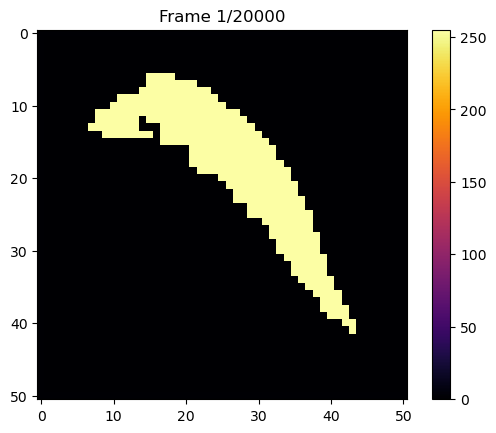

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initialize figure and heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(u[0], cmap='inferno', interpolation='nearest', animated=True)
fig.colorbar(heatmap)

# Update function for animation
def update(frame):
    heatmap.set_array(u[frame])
    ax.set_title(f"Frame {frame+1}/{u.shape[0]}")
    return [heatmap]

# Create the animation
ani = FuncAnimation(
    fig, update, frames=u.shape[0], interval=10, blit=True
)

skip_frames = 100

# Generate frame numbers with a step
all_frames = range(20000) # Total number of frames in the animation
filtered_frames = (i for i in all_frames if i % skip_frames == 0)

plt.show()
ani.save('animation.gif', writer='pillow')

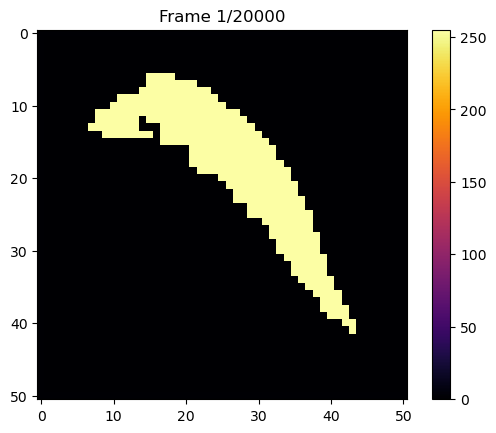

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initialize figure and heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(u[0], cmap='inferno', interpolation='nearest', animated=True)
fig.colorbar(heatmap)

# Update function for animation
def update(frame):
    heatmap.set_array(u[frame])
    ax.set_title(f"Frame {frame+1}/{u.shape[0]}")
    return [heatmap]

# Create the animation
ani = FuncAnimation(
    fig, update, frames=u.shape[0], interval=10, blit=True
)

plt.show()
ani.save('animation.gif', writer='pillow')

In [14]:
img_btw

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(51, 51))

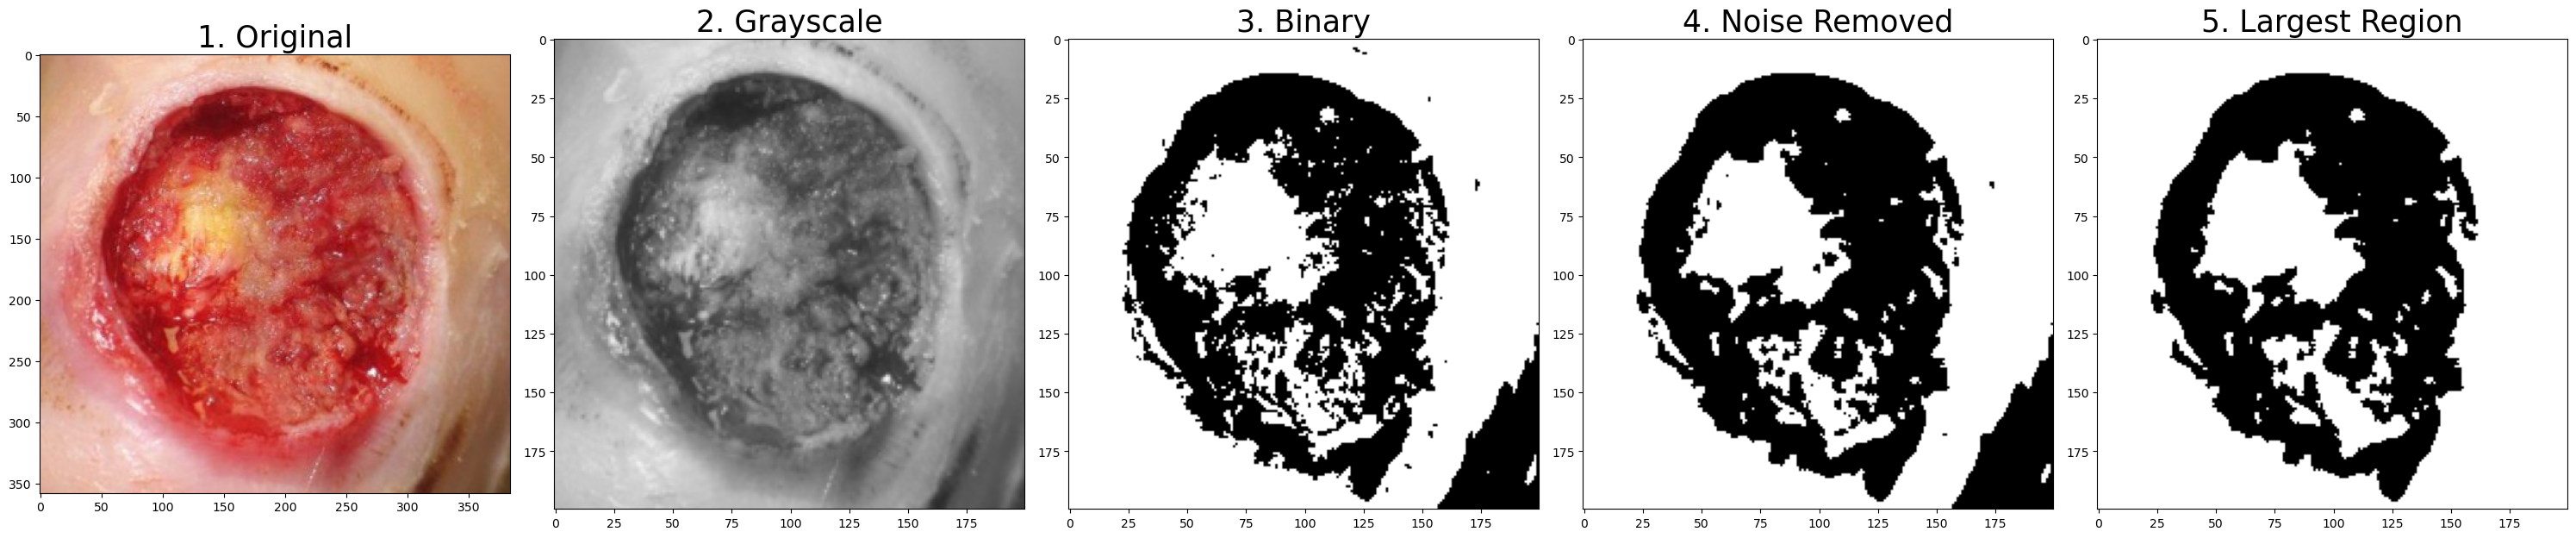

In [370]:
wound_array = main('cut5.jpg')

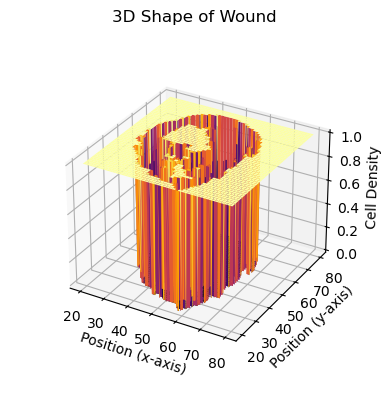

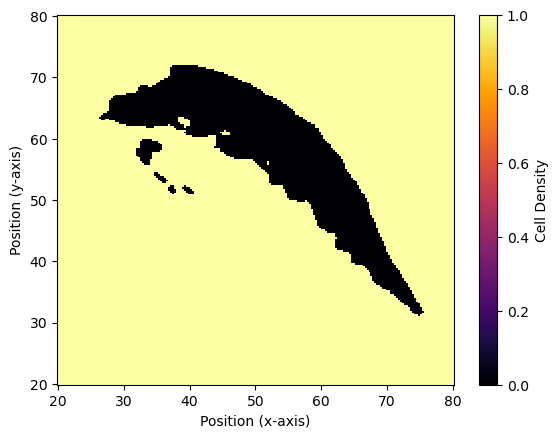

In [371]:
# Parameters for the Model
L = 100 # Length of Surface
nx = 200 # Number of Points for Length in x direction
dx = 60 / (nx - 1) # Length Step Size
ny = 200 # Number of Points for Length in y direction
dy = 60 / (ny - 1) # Length Step Size
D_0 = 1.0 # Diffusion Coefficient
A = 0.01 # Contact Inhibition Constant
alpha = 0.5 # Growth Rate per Day, Exp value of Alpha = 1.8*10**(-3)
dt = 0.01 # Time Step Size (Days) --> Cannot be too big or equation will blow up
nt = 2001 # Numer of Points for Time
days = dt * nt # Total Number of Days

# Distance and Time Points
# Restrict to your boundaries, in this case it is a 60 x 60 wound analogous to the 1D models
x = np.linspace(20, 80, nx)
y = np.linspace(80, 20, ny)

# Setting up the Cell Density Array --> Add your own shape of the wound
# Creates a N by M shape array (in this case, 200 by 200 array) for the position of the wound in the x and y axes
x_2D, y_2D = np.meshgrid(x, y)


# The shape below is that of a pyramid, change accordingly to your ideal wound shape
u_x_1D = np.array(abs((-1/30)*x + 5/3))
u_y_1D = np.array(abs((-1/30)*y + 5/3))
u_x_2D, u_y_2D = np.meshgrid(u_x_1D, u_y_1D)
u = np.maximum(u_x_2D, u_y_2D) # Choosing the maximum value to generate a pyramid shape

# Plotting the 3D shape of the wound for better visualisation
fig_1, ax_1 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax_1.plot_surface(x_2D, y_2D, wound_array, cmap = "inferno")
ax_1.set_title("3D Shape of Wound")
ax_1.set_xlabel("Position (x-axis)")
ax_1.set_ylabel("Position (y-axis)")
ax_1.set_zlabel("Cell Density")
ax_1.set_box_aspect(aspect=None, zoom=0.8)
fig_1.tight_layout

# Plotting the heatmap
fig_2, ax_2 = plt.subplots()
ax_2.set_xticks(np.linspace(20, 80, 7))
ax_2.set_yticks(np.linspace(20, 80, 7))
ax_2.set_xlabel("Position (x-axis)")
ax_2.set_ylabel("Position (y-axis)")
heatmap = ax_2.pcolormesh(x_2D, y_2D, img_cleaned, cmap='inferno', animated=True)
fig_2.colorbar(heatmap, label = "Cell Density")

In [341]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

<class 'numpy.ndarray'>


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

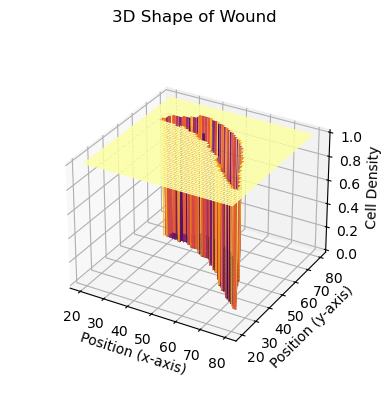

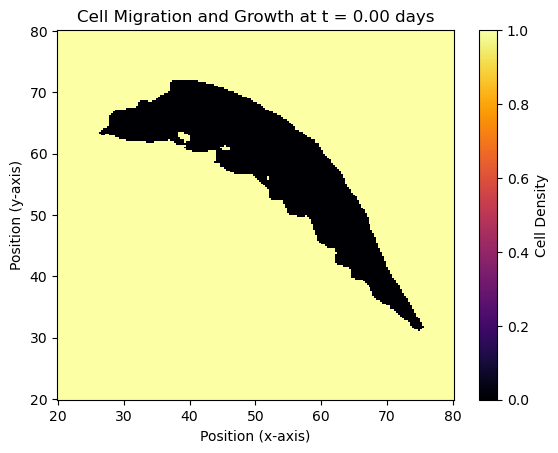

In [343]:
# Parameters for the Model
L = 100 # Length of Surface
nx = 200 # Number of Points for Length in x direction
dx = 60 / (nx - 1) # Length Step Size
ny = 200 # Number of Points for Length in y direction
dy = 60 / (ny - 1) # Length Step Size
D_0 = 1.0 # Diffusion Coefficient
A = 0.01 # Contact Inhibition Constant
alpha = 0.5 # Growth Rate per Day, Exp value of Alpha = 1.8*10**(-3)
dt = 0.01 # Time Step Size (Days) --> Cannot be too big or equation will blow up
nt = 2001 # Numer of Points for Time
days = dt * nt # Total Number of Days

# Distance and Time Points
# Restrict to your boundaries, in this case it is a 60 x 60 wound analogous to the 1D models
x = np.linspace(20, 80, nx)
y = np.linspace(80, 20, ny)

# Setting up the Cell Density Array --> Add your own shape of the wound
# Creates a N by M shape array (in this case, 200 by 200 array) for the position of the wound in the x and y axes
x_2D, y_2D = np.meshgrid(x, y)

print(type(img_cleaned))
#u = img_cleaned.astype(np.float64)

# Plotting the 3D shape of the wound for better visualisation
fig_1, ax_1 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax_1.plot_surface(x_2D, y_2D, u, cmap = "inferno")
ax_1.set_title("3D Shape of Wound")
ax_1.set_xlabel("Position (x-axis)")
ax_1.set_ylabel("Position (y-axis)")
ax_1.set_zlabel("Cell Density")
ax_1.set_box_aspect(aspect=None, zoom=0.8)
fig_1.tight_layout

# Plotting the heatmap
fig_2, ax_2 = plt.subplots()
ax_2.set_xticks(np.linspace(20, 80, 7))
ax_2.set_yticks(np.linspace(20, 80, 7))
ax_2.set_xlabel("Position (x-axis)")
ax_2.set_ylabel("Position (y-axis)")
heatmap = ax_2.pcolormesh(x_2D, y_2D, u, cmap='inferno', animated=True)
fig_2.colorbar(heatmap, label = "Cell Density")

def model(u):
    du_dx = np.zeros_like(u)
    du_dx[:, 0] = (u[:, 1] - u[:, 0]) / dx
    du_dx[:, 1:-1] = (u[:, 2:] - u[:, 0:-2]) / (2 * dx)
    du_dx[:, -1] = (u[:, -1] - u[:, -2]) / dx

    # For considering y instead of x, the indexes will be flipped since it should be going down the rows instead
    du_dy = np.zeros_like(u)
    du_dy[0, :] = (u[1, :] - u[0, :]) / dy
    du_dy[1:-1, :] = (u[2:, :] - u[0:-2, :]) / (2 * dy)
    du_dy[-1, :] = (u[:, -1] - u[:, -2]) / dy

    d2u_dx2 = np.zeros_like(u)
    d2u_dx2[:, 0] = (u[:, 2] - 2 * u[:, 1] + u[:, 0]) / dx**2
    d2u_dx2[:, 1:-1] = (u[:, 2:] - 2 * u[:, 1:-1] + u[:, 0:-2]) / dx**2
    d2u_dx2[:, -1] = (u[:, -1] - 2 * u[:, -2] + u[:, -3]) / dx**2

    # For considering y instead of x, the indexes will be flipped since it should be going down the rows instead
    d2u_dy2 = np.zeros_like(u)
    d2u_dy2[0, :] = (u[2, :] - 2 * u[1, :] + u[0, :]) / dy**2
    d2u_dy2[1:-1, :] = (u[2:, :] - 2 * u[1:-1, :] + u[0:-2, :]) / dy**2
    d2u_dy2[-1, :] = (u[-1, :] - 2 * u[-2, :] + u[-3, :]) / dy**2

    return du_dx, d2u_dx2, du_dy, d2u_dy2

def update(frame):
    # Access global value for u
    global u
    time = frame * dt
    # Obtain du_dx, d2u_dx2, du_dy, d2u_dy2 values for each frame
    du_dx, d2u_dx2, du_dy, d2u_dy2 = model(u)
    first_term = D_0 * (du_dx ** 2) * (-A) * ((A + u) ** (-2))
    second_term = D_0 * A * ((A + u) ** (-1)) * d2u_dx2
    third_term = D_0 * (du_dy ** 2) * (-A) * ((A + u) ** (-2))
    fourth_term = D_0 * A * ((A + u) ** (-1)) * d2u_dy2
    fifth_term = alpha * u * (1 - u)
    du_dt = first_term + second_term + third_term + fourth_term + fifth_term
    # Keep updating the title with each new frame
    ax_2.set_title(f"Cell Migration and Growth at t = {time:.2f} days")
    # Updating Cell Density values only --> Plot first before updating for next frame
    heatmap.set_array(u)
    # Explicit Euler Method
    u += (du_dt * dt)
    return [heatmap]

# fig is the figure needed to be animated, update should be a func that is called for each frame, takes in an iterable frames as an argument
# frames is the iterable that will be passed through update, interval is delay between frames
ani = FuncAnimation(fig_2, update, frames = 100, interval = 30, blit = True)

# .to_jshtml() generates a HTML representation of the animation
# HTML() render argument as HTML
display(HTML(ani.to_jshtml()))

<class 'numpy.ndarray'>


C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:76: RuntimeWarning: overflow encountered in square
  first_term = D_0 * (du_dx ** 2) * (-A) * ((A + u) ** (-2))
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:76: RuntimeWarning: invalid value encountered in multiply
  first_term = D_0 * (du_dx ** 2) * (-A) * ((A + u) ** (-2))
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:78: RuntimeWarning: overflow encountered in square
  third_term = D_0 * (du_dy ** 2) * (-A) * ((A + u) ** (-2))
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:78: RuntimeWarning: invalid value encountered in multiply
  third_term = D_0 * (du_dy ** 2) * (-A) * ((A + u) ** (-2))
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:80: RuntimeWarning: overflow encountered in multiply
  fifth_term = alpha * u * (1 - u)
C:\Users\mewni\AppData\Local\Temp\ipykernel_49368\3778624999.py:48: RuntimeWarning: invalid value encountered in subtract
  du_dx[

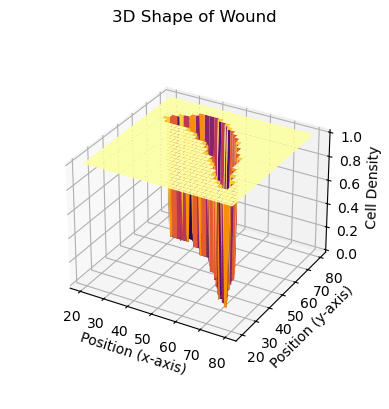

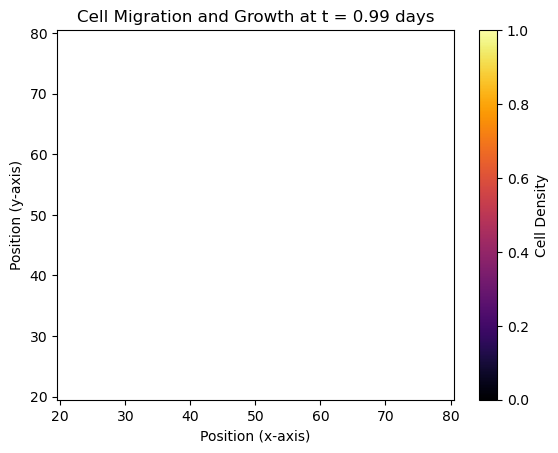

In [110]:
# Parameters for the Model
L = 100 # Length of Surface
nx = 60 # Number of Points for Length in x direction
dx = 60 / (nx - 1) # Length Step Size
ny = 60 # Number of Points for Length in y direction
dy = 60 / (ny - 1) # Length Step Size
D_0 = 1.0 # Diffusion Coefficient
A = 0.01 # Contact Inhibition Constant
alpha = 0.5 # Growth Rate per Day, Exp value of Alpha = 1.8*10**(-3)
dt = 0.01 # Time Step Size (Days) --> Cannot be too big or equation will blow up
nt = 5000 # Numer of Points for Time
days = dt * nt # Total Number of Days

# Distance and Time Points
# Restrict to your boundaries, in this case it is a 60 x 60 wound analogous to the 1D models
x = np.linspace(20, 80, nx)
y = np.linspace(80, 20, ny)

# Setting up the Cell Density Array --> Add your own shape of the wound
# Creates a N by M shape array (in this case, 200 by 200 array) for the position of the wound in the x and y axes
x_2D, y_2D = np.meshgrid(x, y)

print(type(img_cleaned))
u = img_cleaned.astype(np.float64)

# Plotting the 3D shape of the wound for better visualisation
fig_1, ax_1 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax_1.plot_surface(x_2D, y_2D, u, cmap = "inferno")
ax_1.set_title("3D Shape of Wound")
ax_1.set_xlabel("Position (x-axis)")
ax_1.set_ylabel("Position (y-axis)")
ax_1.set_zlabel("Cell Density")
ax_1.set_box_aspect(aspect=None, zoom=0.8)
fig_1.tight_layout

# Plotting the heatmap
fig_2, ax_2 = plt.subplots()
ax_2.set_xticks(np.linspace(20, 80, 7))
ax_2.set_yticks(np.linspace(20, 80, 7))
ax_2.set_xlabel("Position (x-axis)")
ax_2.set_ylabel("Position (y-axis)")
heatmap = ax_2.pcolormesh(x_2D, y_2D, u, cmap='inferno', animated=True)
fig_2.colorbar(heatmap, label = "Cell Density")

def model(u):
    du_dx = np.zeros_like(u)
    du_dx[:, 0] = (u[:, 1] - u[:, 0]) / dx
    du_dx[:, 1:-1] = (u[:, 2:] - u[:, 0:-2]) / (2 * dx)
    du_dx[:, -1] = (u[:, -1] - u[:, -2]) / dx

    # For considering y instead of x, the indexes will be flipped since it should be going down the rows instead
    du_dy = np.zeros_like(u)
    du_dy[0, :] = (u[1, :] - u[0, :]) / dy
    du_dy[1:-1, :] = (u[2:, :] - u[0:-2, :]) / (2 * dy)
    du_dy[-1, :] = (u[:, -1] - u[:, -2]) / dy

    d2u_dx2 = np.zeros_like(u)
    d2u_dx2[:, 0] = (u[:, 2] - 2 * u[:, 1] + u[:, 0]) / dx**2
    d2u_dx2[:, 1:-1] = (u[:, 2:] - 2 * u[:, 1:-1] + u[:, 0:-2]) / dx**2
    d2u_dx2[:, -1] = (u[:, -1] - 2 * u[:, -2] + u[:, -3]) / dx**2

    # For considering y instead of x, the indexes will be flipped since it should be going down the rows instead
    d2u_dy2 = np.zeros_like(u)
    d2u_dy2[0, :] = (u[2, :] - 2 * u[1, :] + u[0, :]) / dy**2
    d2u_dy2[1:-1, :] = (u[2:, :] - 2 * u[1:-1, :] + u[0:-2, :]) / dy**2
    d2u_dy2[-1, :] = (u[-1, :] - 2 * u[-2, :] + u[-3, :]) / dy**2

    return du_dx, d2u_dx2, du_dy, d2u_dy2

def update(frame):
    # Access global value for u
    global u
    time = frame * dt
    # Obtain du_dx, d2u_dx2, du_dy, d2u_dy2 values for each frame
    du_dx, d2u_dx2, du_dy, d2u_dy2 = model(u)
    first_term = D_0 * (du_dx ** 2) * (-A) * ((A + u) ** (-2))
    second_term = D_0 * A * ((A + u) ** (-1)) * d2u_dx2
    third_term = D_0 * (du_dy ** 2) * (-A) * ((A + u) ** (-2))
    fourth_term = D_0 * A * ((A + u) ** (-1)) * d2u_dy2
    fifth_term = alpha * u * (1 - u)
    du_dt = first_term + second_term + third_term + fourth_term + fifth_term
    # Keep updating the title with each new frame
    ax_2.set_title(f"Cell Migration and Growth at t = {time:.2f} days")
    # Updating Cell Density values only --> Plot first before updating for next frame
    heatmap.set_array(u)
    # Explicit Euler Method
    u += (du_dt * dt)
    return [heatmap]

# fig is the figure needed to be animated, update should be a func that is called for each frame, takes in an iterable frames as an argument
# frames is the iterable that will be passed through update, interval is delay between frames
ani = FuncAnimation(fig_2, update, interval = 30, frames=100, blit = True)

# .to_jshtml() generates a HTML representation of the animation
# HTML() render argument as HTML
display(HTML(ani.to_jshtml()))